# Under Evaluation ...

# Intrusion Detection System
#### Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders.

for more information please refer to: http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

train_df = pd.read_csv("kddcup.data", header=None, names=col_names, sep=",")
test_df = pd.read_csv("KDD_test", header=None, names=col_names)

print(f"Traning dataset dimentions: {train_df.shape}")
print(f"Testing dataset dimentions: {test_df.shape}")
train_df.head()

Traning dataset dimentions: (4898431, 42)
Testing dataset dimentions: (311029, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


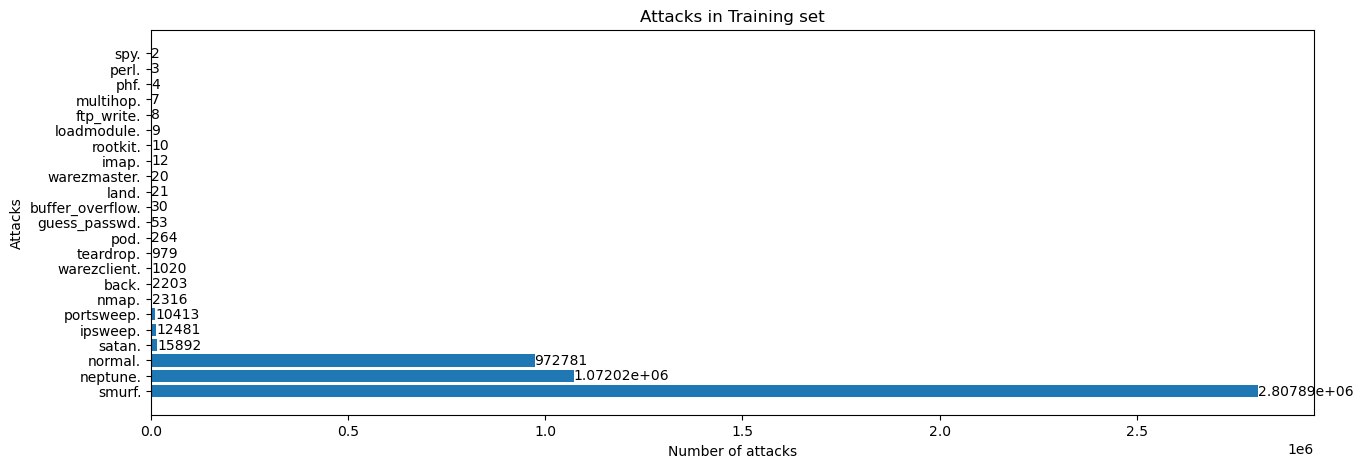

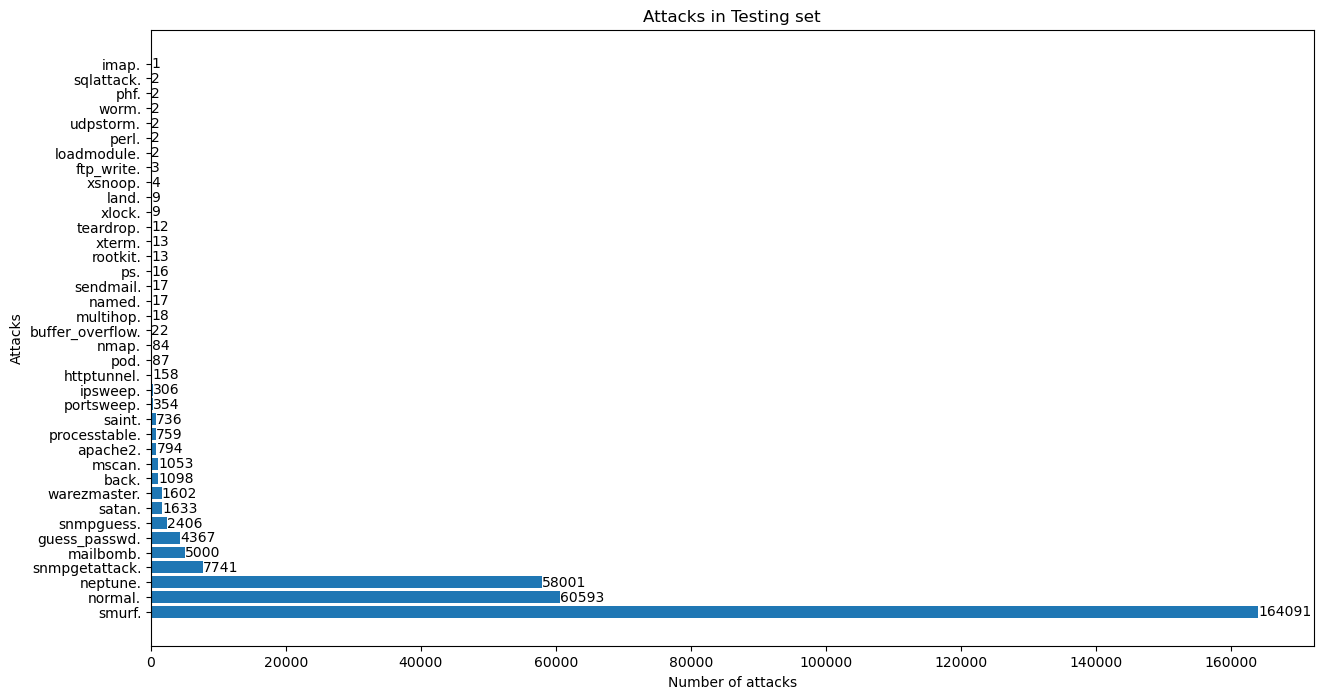

In [3]:
def plot_attacks(dataset, size=(10,10), title=None):
    """
    Plot Horizental Bar chart for the 'target' columns
    
    Keyword arguments:
    dataset - Dataset to plot from 
    size - size of the figure (Defualt=(10,10))
    title - title for the figure (Defualt=None)
    """
    df = pd.DataFrame({'column_name':dataset["target"]})
    value_counts = df['column_name'].value_counts()
    dataset = pd.DataFrame({'Category': value_counts.index, 'Count': value_counts.values})

    fig, ax = plt.subplots(figsize=size)
    bars = ax.barh(dataset["Category"], dataset["Count"])
    ax.set_title(title)
    ax.set_xlabel("Number of attacks")
    ax.set_ylabel("Attacks")
    ax.bar_label(bars);
    
plot_attacks(train_df, (15, 5), "Attacks in Training set")
plot_attacks(test_df, (15, 8), "Attacks in Testing set")

## Data Preprocessing

#### Attacks fall into four main categories:

* DOS: denial-of-service, e.g. syn flood;
* R2L: unauthorized access from a remote machine, e.g. guessing password;
* U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
* probing: surveillance and other probing, e.g., port scanning.

#### Rename every attack label: 
- normal = 0 
- DoS    = 1
- Probe  = 2
- R2L    = 3
- U2R    = 4

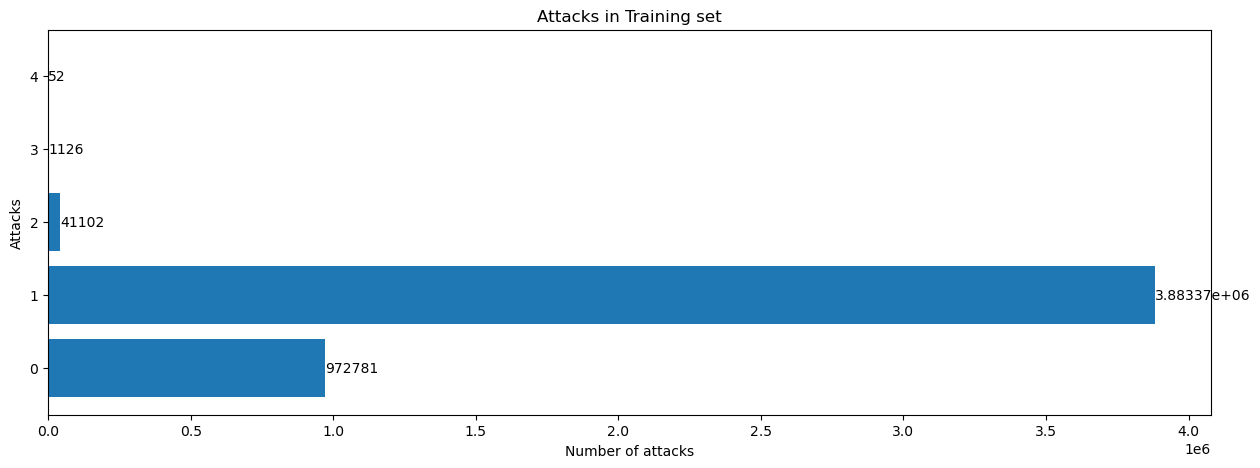

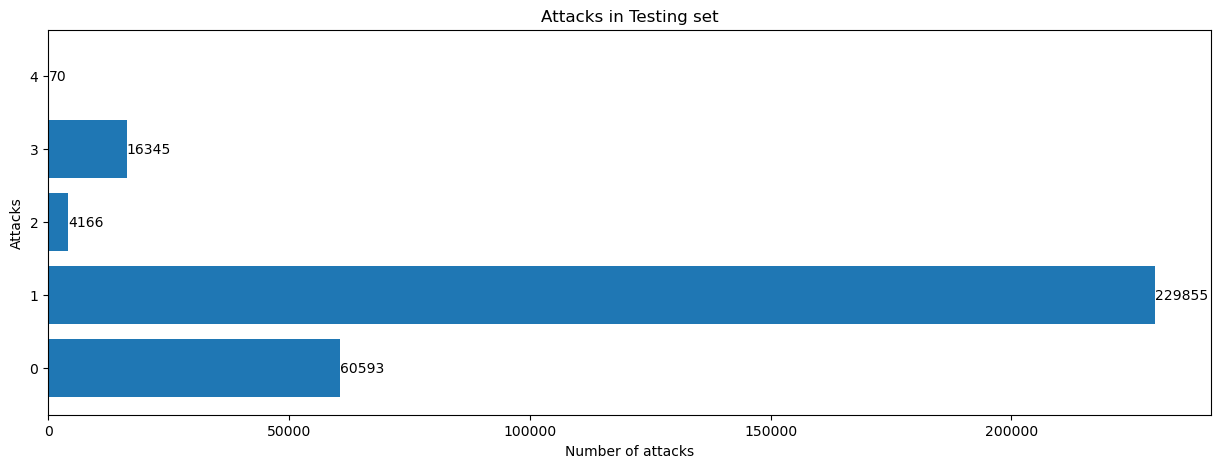

In [4]:
# take label column
labeldf = train_df["target"]
labeldf_test = test_df["target"]
# change the label column
newlabeldf = labeldf.replace(
    {'normal.': 0, 'neptune.': 1 ,'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1,'mailbomb.': 1, 
     'apache2.': 1, 'processtable.': 1, 'udpstorm.': 1, 'worm.': 1, 'ipsweep.': 2,'nmap.': 2,'portsweep.': 2,
     'satan.': 2,'mscan.': 2,'saint.': 2, 'ftp_write.': 3,'guess_passwd.': 3,'imap.': 3,'multihop.': 3,'phf.': 3,
     'spy.': 3, 'warezclient.': 3,'warezmaster.': 3,'sendmail.': 3,'named.': 3,'snmpgetattack.': 3,'snmpguess.': 3,
     'xlock.': 3,'xsnoop.': 3,'httptunnel.': 3,'buffer_overflow.': 4, 'loadmodule.': 4,'perl.': 4,'rootkit.': 4,
     'ps.': 4,'sqlattack.': 4,'xterm.': 4})

newlabeldf_test = labeldf_test.replace(
    {'normal.': 0, 'neptune.': 1 ,'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1,'mailbomb.': 1, 
     'apache2.': 1, 'processtable.': 1, 'udpstorm.': 1,'worm.': 1,'ipsweep.': 2,'nmap.': 2,'portsweep.': 2,
     'satan.': 2,'mscan.': 2,'saint.': 2,'ftp_write.': 3,'guess_passwd.': 3,'imap.': 3,'multihop.': 3,'phf.': 3,
     'spy.': 3,'warezclient.': 3,'warezmaster.': 3,'sendmail.': 3,'named.': 3, 'snmpgetattack.': 3,'snmpguess.': 3,
     'xlock.': 3,'xsnoop.': 3,'httptunnel.': 3,'buffer_overflow.': 4,'loadmodule.': 4,'perl.': 4,'rootkit.': 4,
     'ps.': 4, 'sqlattack.': 4,'xterm.': 4})

# put the new label column back
train_df["target"] = newlabeldf
test_df["target"] = newlabeldf_test

plot_attacks(train_df, (15, 5), "Attacks in Training set")
plot_attacks(test_df, (15, 5), "Attacks in Testing set")

### Extract the catogerical features

In [5]:
def get_catogerical_features(dataset):
    """
    Get categoriral featrues in the dataset
    """
    for col_name in dataset.columns:
        if dataset[col_name].dtypes == "object" :
            unique_cat = len(dataset[col_name].unique())
            print(f"Feature '{col_name}' has {unique_cat} categories")
            
print("Training set:")
get_catogerical_features(train_df)

print("\nTesting set:")
get_catogerical_features(test_df)

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories

Testing set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 65 categories
Feature 'flag' has 11 categories


In [6]:
categorical_columns = ['protocol_type', 'service', 'flag']

df_categorical_values = train_df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


In [7]:
def get_categories(dataset, column, string):
    """
    Get unique categories from the specified dataset and column.

    Parameters:
        dataset (DataFrame): The dataset containing the categorical column.
        column (str): The name of the categorical column.
        string (str): A string to prefix the unique categories.

    Returns:
        list: A list of strings representing unique categories, each prefixed with the provided string.
    """
    
    unique_cat = sorted(dataset[column].unique())
    unique_category = [string + x for x in unique_cat]
    
    return unique_category

unique_protocol = get_categories(train_df, "protocol_type", "Protocol_type_")
unique_service = get_categories(train_df, "service", "service_")
unique_falg = get_categories(train_df, "flag", "flag_")

unique_categories_list = unique_protocol + unique_service + unique_falg

unique_service_test = get_categories(test_df, "service", "service_")

test_columns = unique_protocol + unique_service_test + unique_falg

### Applying `OneHotEncoder` and `LabelEncoder` 

In [8]:
from sklearn.preprocessing import LabelEncoder

df_categorical_values_enc = df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc = testdf_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type service flag
0           tcp    http   SF
1           tcp    http   SF
2           tcp    http   SF
3           tcp    http   SF
4           tcp    http   SF
--------------------
   protocol_type  service  flag
0              1       24     9
1              1       24     9
2              1       24     9
3              1       24     9
4              1       24     9


In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=unique_categories_list)


# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=test_columns)

### Finding and Adding Missing Categorical Columns

The `find_difference` function is used to find categorical service values that exist in one dataframe but not in another. It then adds corresponding columns to the target dataframe with default values of 0.

In [10]:
def find_difference(has_more, has_less): 
    """
    Find the categorical service values that exist in `has_more` but not in `has_less`,
    and add corresponding columns to the target dataframe with default values of 0.

    Parameters:
        has_more (DataFrame): DataFrame with more categorical values.
        has_less (DataFrame): DataFrame with fewer categorical values.

    Returns:
        None
    """
    more_service = has_more['service'].tolist()
    less_service = has_less['service'].tolist()
    difference = list(set(more_service) - set(less_service))
    
    string = 'service_'
    difference = [string + x for x in difference]
    
    if has_more.equals(train_df):
        for col in difference:
            testdf_cat_data[col] = 0
    elif has_more.equals(test_df):
        for col in difference:
            df_cat_data[col] = 0

find_difference(train_df, test_df)
find_difference(test_df, train_df)

print(df_cat_data.shape)    
print(testdf_cat_data.shape)

(4898431, 85)
(311029, 85)


### Updating Dataframes with Additional Categorical Columns

The dataframes `new_train_df` and `new_test_df` are updated by joining them with the additional categorical columns obtained from `df_cat_data` and `testdf_cat_data`. After joining, the original categorical columns are dropped to prevent duplication.

In [11]:
new_train_df = train_df.join(df_cat_data)
new_train_df.drop(categorical_columns, inplace=True, axis=1)

new_test_df = test_df.join(testdf_cat_data)
new_test_df.drop(categorical_columns, inplace=True, axis=1)

### Arranging Columns in `new_test_df`

To ensure consistency in the order of columns between `new_train_df` and `new_test_df`, the columns in `new_test_df` are arranged to match the order of columns in `new_train_df`.

In [12]:
arrange_columns = list(new_train_df.columns)
new_test_df = new_test_df[arrange_columns]

In [13]:
new_test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_icmp
0,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,105,146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
new_train_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_icmp
0,0,215,45076,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0,162,4528,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0,236,1228,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0,233,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


### Preparing Feature and Target Sets for Training and Testing

In [15]:
X_train = new_train_df.drop("target", axis=1)
y_train = new_train_df["target"]

X_test = new_test_df.drop("target", axis=1)
y_test = new_test_df["target"]

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_preds(y_true, y_preds):
    """
    Evaluate the performance of classification predictions using various metrics.

    Parameters:
        y_true (array-like): True labels or ground truth.
        y_preds (array-like): Predicted labels from a classifier.

    Returns:
        dict: A dictionary containing the calculated evaluation metrics.
            - "accuracy" (float): Accuracy score.
            - "precision" (float): Weighted precision score.
            - "recall" (float): Weighted recall score.
            - "f1" (float): Weighted F1 score.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average="weighted")
    recall = recall_score(y_true, y_preds, average="weighted")
    f1 = f1_score(y_true, y_preds, average="weighted")
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
#     print(f"Acc: {accuracy * 100:.2f}%")
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1 score: {f1:.2f}")
    
    return metric_dict

## Fitting the model to the data

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(verbose=2, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "Random Forest": RandomForestClassifier(verbose=2, n_jobs=-1)
}

def fit_and_score(model, X_train, y_train, X_test, y_test):
    """
    Fit and evaluate multiple models on the given data.

    Args:
        models (dict): A dictionary of model names as keys and corresponding model objects as values.
        X_train (array-like): Training feature data.
        y_train (array-like): Training target data.
        X_test (array-like): Testing feature data.
        y_test (array-like): Testing target data.

    Returns:
        dict: Dictionary containing evaluation results for each model.
    """
    model_score = {}
    
    np.random.seed(42)
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        model_score[name] = evaluate_preds(y_test, y_preds)
        
    return model_score

model_scores = fit_and_score(models, X_train, y_train, X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          620     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.88372D+06    |proj g|=  2.69823D+09


 This problem is unconstrained.



At iterate    1    f=  7.69983D+06    |proj g|=  2.41672D+09

At iterate    2    f=  6.12106D+06    |proj g|=  2.63193D+09

At iterate    3    f=  6.10191D+06    |proj g|=  4.04918D+09

At iterate    4    f=  5.76607D+06    |proj g|=  2.04588D+09

At iterate    5    f=  5.54509D+06    |proj g|=  4.33030D+09

At iterate    6    f=  5.40218D+06    |proj g|=  2.74059D+09

At iterate    7    f=  5.08054D+06    |proj g|=  2.34620D+09

At iterate    8    f=  4.95940D+06    |proj g|=  1.80657D+09

At iterate    9    f=  3.65855D+06    |proj g|=  5.14953D+09

At iterate   10    f=  3.45678D+06    |proj g|=  5.14240D+09

At iterate   11    f=  3.42775D+06    |proj g|=  4.93125D+09

At iterate   12    f=  3.24571D+06    |proj g|=  4.69938D+09

At iterate   13    f=  3.19140D+06    |proj g|=  2.10917D+09

At iterate   14    f=  3.13580D+06    |proj g|=  1.44748D+09

At iterate   15    f=  3.06494D+06    |proj g|=  5.21228D+09

At iterate   16    f=  3.01267D+06    |proj g|=  4.53102D+09

At iter

/Users/musabalsaifi/Desktop/ml-course/KDD/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 110.9min finished
/Users/musabalsaifi/Desktop/ml-course/KDD/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend ThreadingBa

building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.1s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


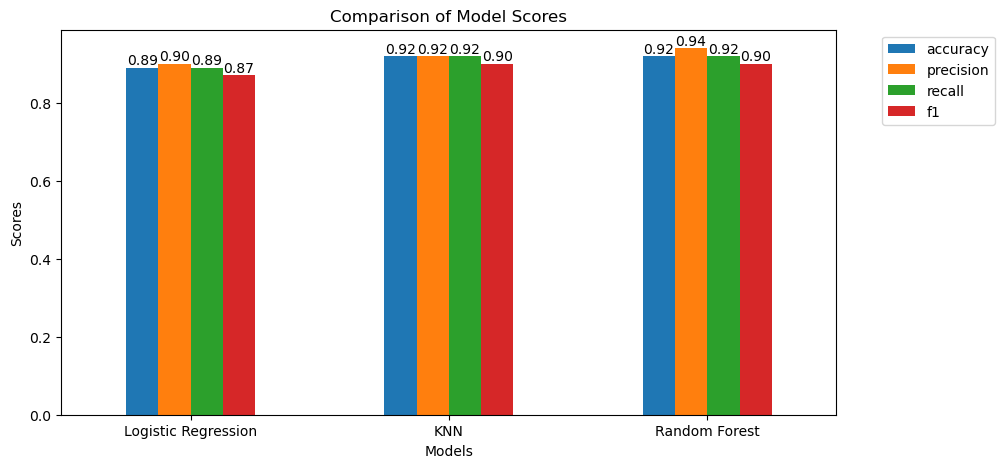

In [41]:
models_comparison = pd.DataFrame(model_scores)

ax = models_comparison.T.plot.bar(rot=0, figsize=(10, 5))

for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2f"),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5),
                textcoords="offset points")

# Set plot labels and title
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Model Scores")

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left");

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
evaluate_preds(y_test, y_pred)

Acc: 92.29%
Precision: 0.94
Recall: 0.92
F1 score: 0.90


{'accuracy': 0.92, 'precision': 0.94, 'recall': 0.92, 'f1': 0.9}

## Evaluating the model with `cross_val_score`

In [22]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
print(f"Accuracy: {accuracy.mean()*100:.2f}% (+/- {accuracy.std()*2*100:.2f}%)")

precision = cross_val_score(clf, X_train, y_train, cv=3, scoring='precision_weighted')
print(f"Precision: {precision.mean():.2f} (+/- {precision.std()*2:.2f})")

recall = cross_val_score(clf, X_train, y_train, cv=3, scoring='recall_weighted')
print(f"Recall: {recall.mean():.2f} (+/- {recall.std()*2:.2f})")

f_measure = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_weighted')
print(f"F1: {f_measure.mean():.2f} (+/- {f_measure.std()*2:.2f})")

Accuracy: 95.52% (+/- 12.41%)
Precision: 1.00 (+/- 0.01)
Recall: 0.96 (+/- 0.12)
F1: 0.97 (+/- 0.07)


## Evaluating the model with `roc_curve`

In [23]:
from sklearn.metrics import roc_curve

y_proba = clf.predict_proba(X_test)

In [24]:
def get_all_roc_coordinates(true_labels, predicted_probabilities):
    """
    Calculate True Positive Rate (TPR) and False Positive Rate (FPR) coordinates for ROC curve.

    Parameters:
        true_labels (array-like): True class labels.
        predicted_probabilities (array-like): Predicted probabilities for the positive class.

    Returns:
        tuple: TPR and FPR coordinates.
    """
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
    return tpr, fpr

def plot_roc_curve(fpr, tpr, ax=None):
    """
    Plot the Receiver Operating Characteristic (ROC) curve.

    Parameters:
        fpr (array-like): False Positive Rate values.
        tpr (array-like): True Positive Rate values.
        ax (matplotlib Axes): The Axes on which to plot the ROC curve.

    Returns:
        None
    """
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.plot(fpr, tpr, label='ROC Curve')
    ax.plot([0, 1], [0, 1], 'k--', label='Guessing')
    
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend()


### Plots the Probability Distributions and the ROC Curves One vs Res

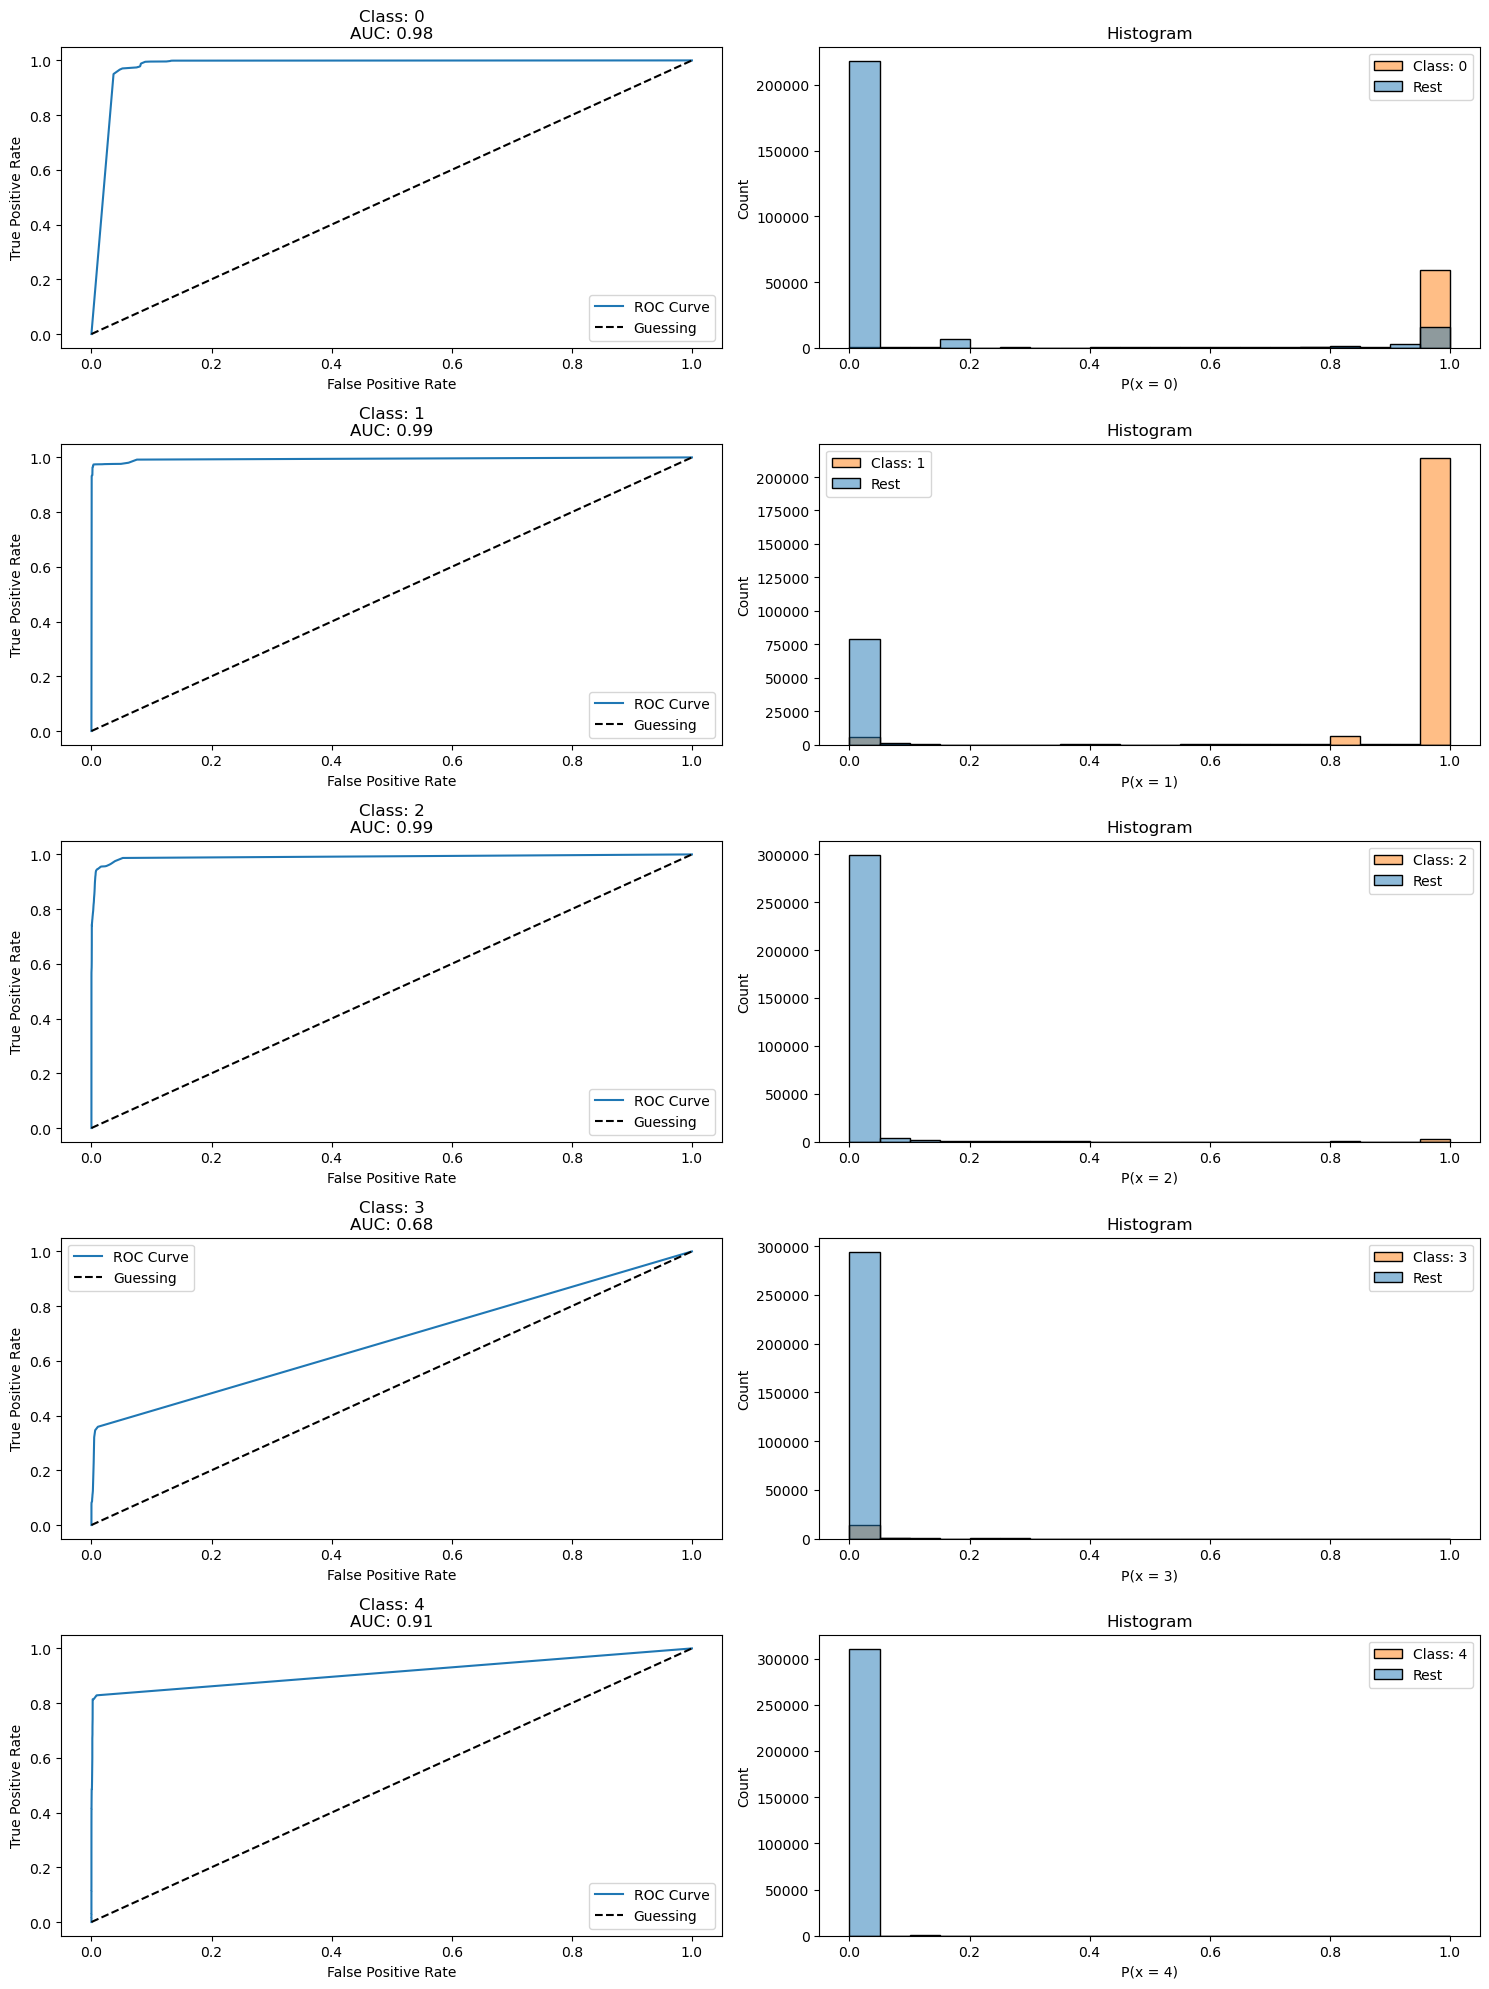

In [25]:
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(15, 20))  

# Define bins for histogram
bins = [i / 20 for i in range(20)] + [1]

# Get the list of classes from the classifier
classes = clf.classes_

# Dictionary to store ROC AUC values for each class
roc_auc_ovr = {}

for i in range(len(classes)):
    c = classes[i]  # Get the current class
    
    # Prepare an auxiliary DataFrame to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]  # Probabilities for the current class
    df_aux = df_aux.reset_index(drop=True)
    
    # Calculate the ROC coordinates and AUC value
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    auc_value = roc_auc_score(df_aux['class'], df_aux['prob'])
    roc_auc_ovr[c] = auc_value
    
    # Create subplots for ROC curve and histogram side by side
    ax_left = plt.subplot(5, 2, i * 2 + 1)  # Creating a subplot for ROC
    plot_roc_curve(fpr, tpr, ax=ax_left)  # Plot ROC curve
    ax_left.set_title(f"Class: {c}\nAUC: {auc_value:.2f}")
    
    ax_right = plt.subplot(5, 2, i * 2 + 2)  # Creating a subplot for histogram
    sns.histplot(x="prob", data=df_aux, hue='class', color='b', ax=ax_right, bins=bins)
    ax_right.set_xlabel(f"P(x = {c})")
    ax_right.set_title("Histogram")
    ax_right.legend([f"Class: {c}", "Rest"])

plt.tight_layout();

## Evaluating the model with Confusion Matrix: `ConfusionMatrixDisplay`

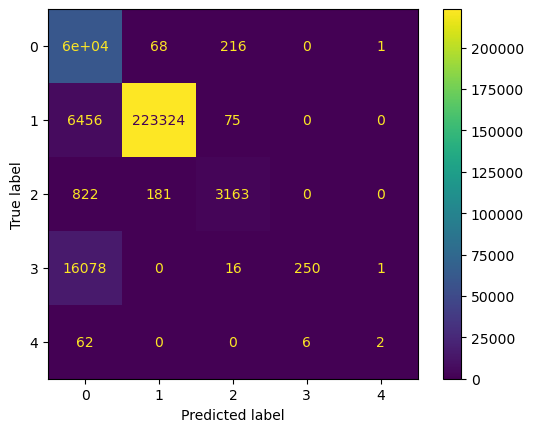

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

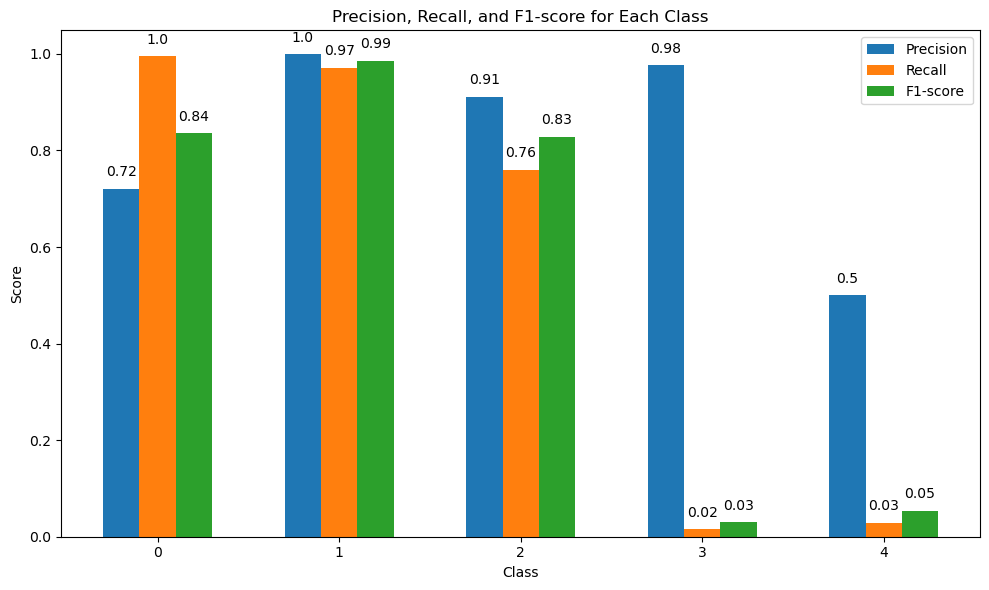

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

classes = [0, 1, 2, 3, 4]
precision_scores = precision_score(y_test, y_pred, labels=classes, average=None)
recall_scores = recall_score(y_test, y_pred, labels=classes, average=None)
f1_scores = f1_score(y_test, y_pred, labels=classes, average=None)

x = np.array(classes)

plt.figure(figsize=(10, 6))

# Plot precision scores
bars1 = plt.bar(x - 0.2, precision_scores, width=0.2, label='Precision')
# Plot recall scores
bars2 = plt.bar(x, recall_scores, width=0.2, label='Recall')
# Plot F1-scores
bars3 = plt.bar(x + 0.2, f1_scores, width=0.2, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xticks(x, classes)
plt.legend()

# Add values on top of the bars
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

add_values(bars1)
add_values(bars2)
add_values(bars3)

# Show the plot
plt.tight_layout();

## Classification Report

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     60593
           1       1.00      0.97      0.99    229855
           2       0.91      0.76      0.83      4166
           3       0.98      0.02      0.03     16345
           4       0.50      0.03      0.05        70

    accuracy                           0.92    311029
   macro avg       0.82      0.55      0.55    311029
weighted avg       0.94      0.92      0.90    311029



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=42)

grid = {"n_estimators": [100, 300, 500, 700],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "max_depth": [None, 10]}

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            cv=cv,
                            verbose=3)

rs_clf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
rs_preds = gs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_preds)

In [23]:
print(best_params)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
